# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_palette(sns.color_palette("husl", 8))
sns.set_style("darkgrid")
%matplotlib inline  

In [2]:
billboard = pd.read_csv("./billboard.csv")
print(billboard.head())

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week     ...      \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0     ...       
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0     ...       
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0     ...       
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0     ...       
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0     ...       

   x67th.week  x68th.week  x69th.week  x70th.week 

In [3]:
print(billboard.columns)
#look at the columns to see what kind of data we have and start to think about what we can do with the data

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x

In [4]:
print(billboard['year'].unique())
#looks like all data is from year 2000

[2000]


In [5]:
print(billboard['artist.inverted'].value_counts().value_counts())
#this shows a count of how many times an artist appears on the top 100

1    164
2     43
3     18
4      2
5      1
Name: artist.inverted, dtype: int64


In [6]:
billboard[list(billboard.columns[1:7])].describe()
#this shows information about the qualitative data columns

,artist.inverted,track,time,genre,date.entered,date.peaked
count,317,317,317,317,317,317
unique,228,316,126,10,68,53
top,Jay-Z,Where I Wanna Be,3:50,Rock,2000-01-29,2000-12-02
freq,5,2,9,137,11,17


In [7]:
billboard['genre'].value_counts()
#looks to see what genres are most frequent on the billboard top 100

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data shows songs that appeared on the Billboard top 100 at some point in the year 2000 and how their ranks changed over the next 76 weeks.


The longest a song lasted on the list was 65 weeks.

Most artists have only 1 song on the top 100, Jay-Z had 5

Rock songs were appeared most frequently, followed by country and rap

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

In [8]:
#rename artist column
billboard.rename(columns={'artist.inverted': 'artist'}, inplace=True)

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [9]:
week_column_list = list(billboard.columns[7:]) #sets up value variable list to use in melt function
my_id_vars = list(billboard.columns[:7]) #sets up id variable list to use in melt function

In [10]:
long_billboard = pd.melt(billboard,id_vars=my_id_vars,value_vars=week_column_list, value_name='rank',var_name='week')
long_billboard.head()
#completed melt function

,year,artist,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


In [11]:
billboard['top_rank'] = billboard[list(billboard.ix[:,7:].columns)].min(axis=1)
#get the top rank of each song

In [12]:
#converts time column into seconds
seconds_list=[]
for i in billboard["time"]:
    seconds_list.append(int(i.split(":")[0])*60+int(i.split(':')[1]))
billboard["time in seconds"] = seconds_list

#convert the date fields into datetime datatypes
billboard["date.entered"] = pd.to_datetime(billboard["date.entered"])
billboard["date.peaked"] = pd.to_datetime(billboard["date.peaked"])

#create new field that calculates difference between peak and entrance date
billboard["days_to_peak"] = (billboard["date.peaked"]-billboard["date.entered"]).dt.days


## Step 3: Visualize your data.

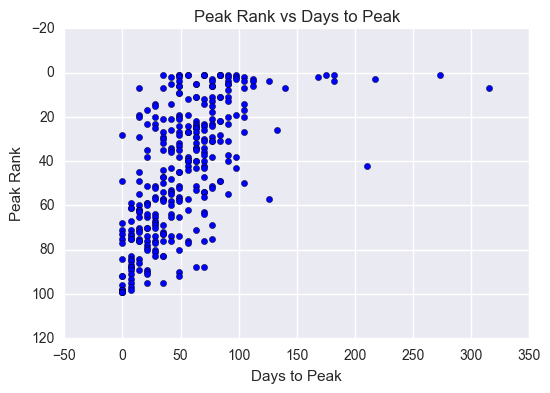

In [79]:
#does a song's top rank appear to have anything to do with it's days until peak??
#we'll do a scatterplot to see if there appears to be any correlation.

plt.scatter(y=billboard['peak_rank'],x=billboard['days_to_peak'])
plt.title("Peak Rank vs Days to Peak")
plt.ylabel("Peak Rank")
plt.xlabel("Days to Peak")
plt.gca().invert_yaxis()
plt.show()

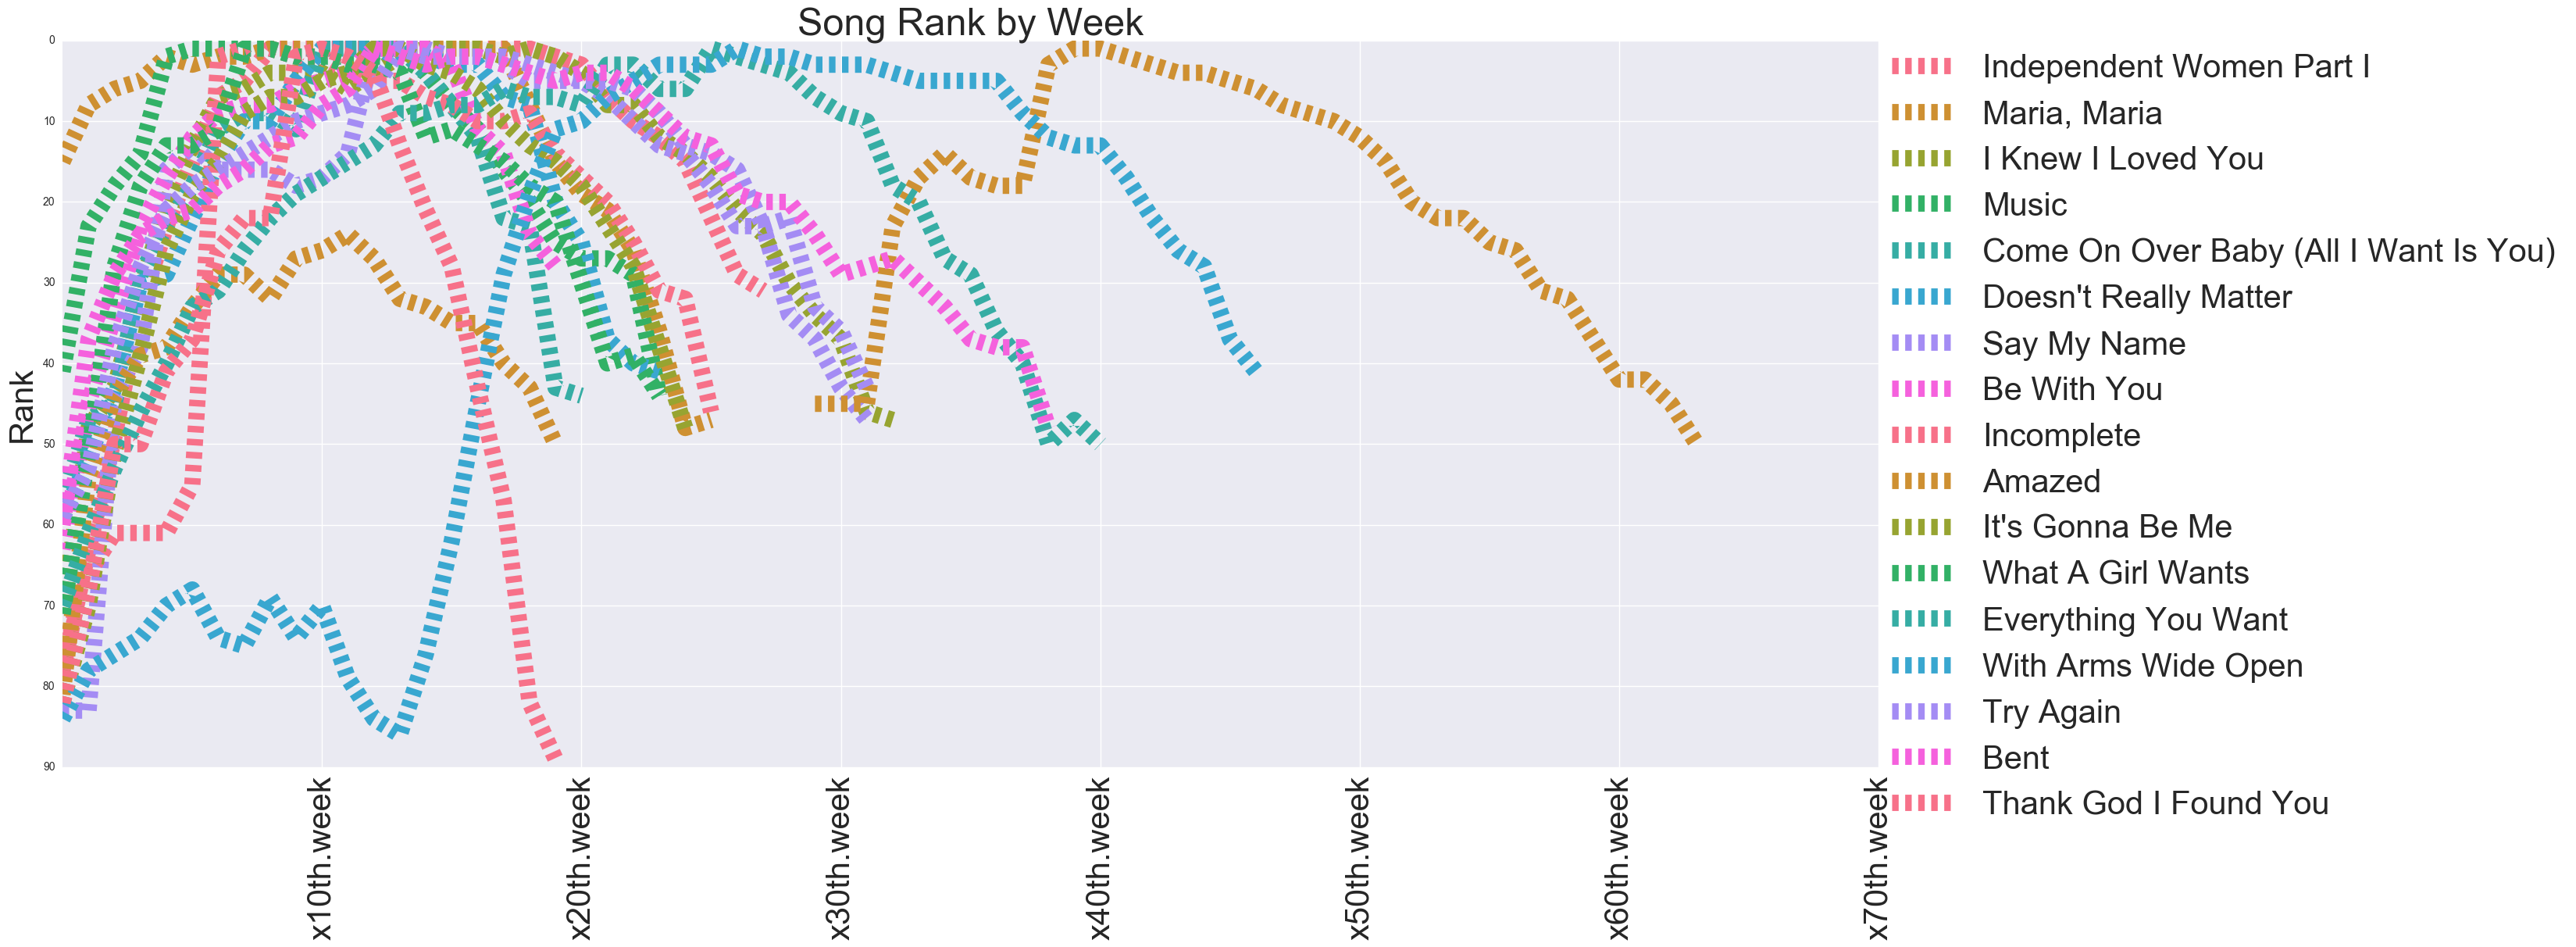

In [82]:
reached_rank_1 = billboard[billboard['peak_rank']==1]
songs = reached_rank_1['track']
weeks = reached_rank_1.ix[:,week_column_list]
#print(result.columns)
result= pd.concat([songs,weeks],axis=1)
plt.figure(figsize=(30,12))

for i in range(len(result)):
    plt.plot(range(len(result.ix[0,:])-1),result.ix[:,1:].values[i],label=str(result.ix[i,0]),linewidth=15,ls="--")

plt.xticks(range((len(result.ix[0,:])-1))[10::10],result.columns[10::10],rotation=90,fontsize=30)
plt.gca().invert_yaxis()
plt.title("Song Rank by Week",fontsize=35)
plt.ylabel("Rank",fontsize=30)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,fontsize=30)
plt.show()

13.5294117647


C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


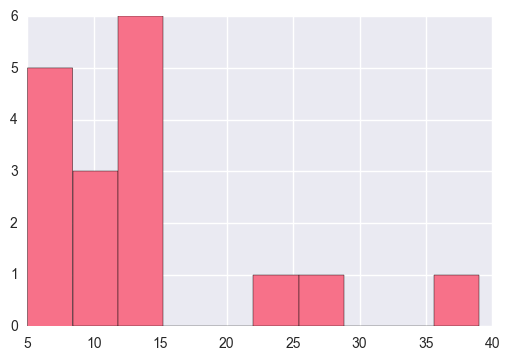

In [83]:
reached_rank_1["peak_week"] = reached_rank_1["days_to_peak"]/7
reached_rank_1["peak_week"].astype(int)

print(np.mean(reached_rank_1["peak_week"]))
plt.hist(reached_rank_1["peak_week"],bins=10)
plt.show()

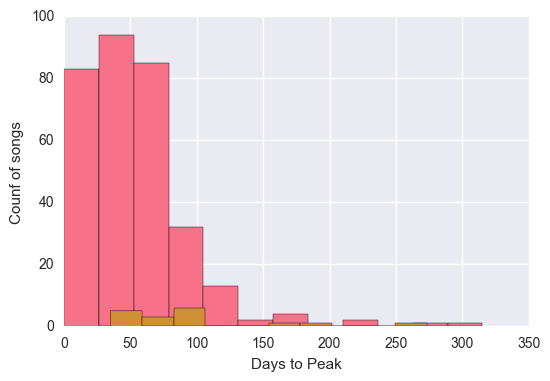

In [17]:
plt.hist(billboard["days_to_peak"],bins=12)
plt.hist(reached_rank_1["days_to_peak"],bins=10)
plt.xlabel("Days to Peak")
plt.ylabel("Counf of songs")
plt.show()

It appears that songs that reach #1 on the billboard 100 take a significant amount of time to reach their peak at #1.
While most songs peak within their first 50 days, most #1 hits don't peak until after that.

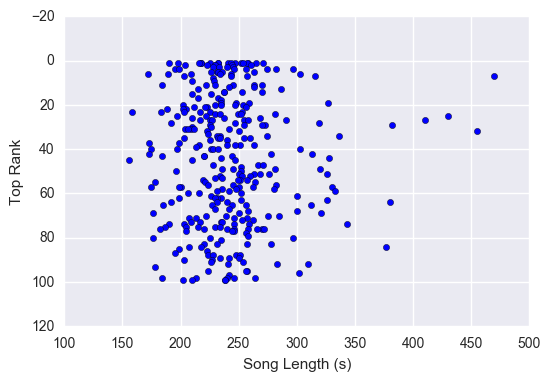

In [18]:
#plot to see if there is any correlation between song length and the top rank a song achieves
#do long songs do as well as short songs?
plt.scatter(y=billboard["top_rank"],x=billboard["time in seconds"])
plt.ylabel("Top Rank")
plt.xlabel("Song Length (s)")
plt.gca().invert_yaxis()
plt.show()

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

In [19]:
#Is there an ideal time to debut on the billboard 100? Do songs released at certain times tend to have a better peak?

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


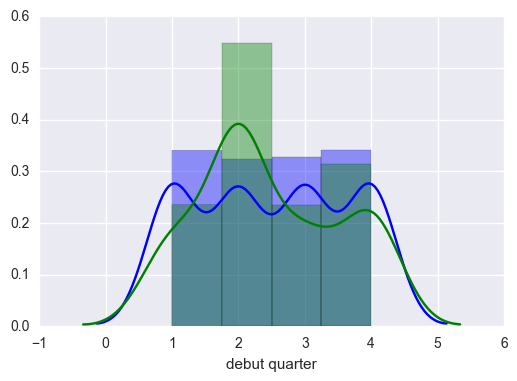

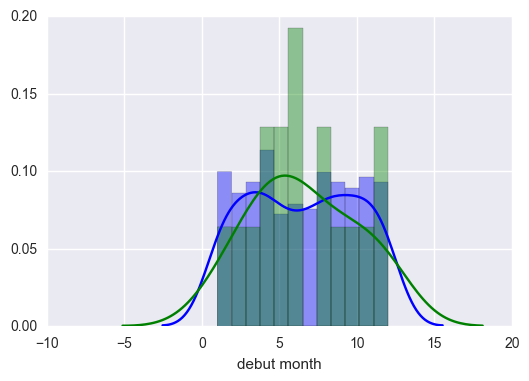

In [20]:
#use billboard DF to find if the time of year a song debuts is related to it's peak (go by month or make a categorical column for season)
billboard["debut quarter"] = billboard["date.entered"].dt.quarter
billboard["debut month"] = billboard["date.entered"].dt.month
reached_rank_1["debut quarter"] = reached_rank_1["date.entered"].dt.quarter

reached_rank_1["debut month"] = reached_rank_1["date.entered"].dt.month

#plot the distributions of the entire population and the 'reached rank 1' population to see if they differ:

sns.distplot(billboard["debut quarter"],color='blue',label = "All Songs")
sns.distplot(reached_rank_1["debut quarter"],color='green',label="Reached Rank #1")
plt.show()


sns.distplot(billboard["debut month"],color='blue',bins=12,label="All Songs")
sns.distplot(reached_rank_1["debut month"],color='green',bins=12,label="Reached Rank #1")
sns.plt.xlim=(0,13)
plt.show()

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

I recently looked into a dataset which lists all songs that made the Billboard Top 100 list in the year 2000.  The data
tracks each song from the date it entered up to 76 weeks afterwards (although no songs made it past 65 weeks).  

The dataset is what I consider 'healthy'.  There are no missing values and the data doesn't appear corrupted in any way.  It does lack in metrics we want to use and explore, however, we are able to derive some of these datapoints from what we do have.  Fields I derived are:
    > Days to Peak
    > Peak Rank
    > Debut Month
    > Debut Quarter
    > Weeks in Top 100


To derive the 'Days to Peak' field we first convert the 'date.entered' and 'date.peaked' fields to the datetime datatype.  Then we assign the day value of the difference between them to our new field:

    #convert the date fields into datetime datatypes
    billboard['date.entered'] = pd.to_datetime(billboard['date.entered'])
    billboard['date.peaked'] = pd.to_datetime(billboard['date.peaked'])

    #create new field that calculates difference between peak and entrance date
    billboard['days_to_peak'] = (billboard["date.peaked"]-billboard['date.entered']).dt.days

Getting the Peak Rank we find the minimum value through the week columns:

    billboard['top_rank'] = billboard[list(billboard.ix[:,week_column_list].columns)].min(axis=1)


To create the debut month and quarter fields we take the quarter and month attibutes of the date.'entered' field:

    billboard["debut quarter"] = billboard["date.entered"].dt.quarter
    billboard["debut month"] = billboard["date.entered"].dt.month
    

Using this data I've created some visualizations that show us hoe songs move through the Top 100 list over time and tell us when the most #1 hits debuted over the course of the year.  We'll also see how top rank relates to number of weeks in the top 100!

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_palette(sns.color_palette("husl", 8))
sns.set_style("darkgrid")
%matplotlib inline  

In [42]:
billboard = pd.read_csv("./billboard.csv")

In [43]:
week_column_list = list(billboard.columns[7:]) #sets up list to let me pick only weekly ranking data columns use in melt function

#sets up days to peak, debut month, and debut quarter fields
billboard['date.entered'] = pd.to_datetime(billboard['date.entered'])
billboard['date.peaked'] = pd.to_datetime(billboard['date.peaked'])
billboard['days_to_peak'] = (billboard["date.peaked"]-billboard['date.entered']).dt.days
billboard["debut quarter"] = billboard["date.entered"].dt.quarter
billboard["debut month"] = billboard["date.entered"].dt.month

#sets up peak_rank field
billboard['peak_rank'] = billboard[list(billboard.ix[:,week_column_list].columns)].min(axis=1)
#sets up weeks in top 100 field
billboard['weeks in top 100'] = billboard[list(billboard.ix[:,week_column_list].columns)].count(axis=1)


Looking into the number of days after a song's debut we find that most of the time the higher a song's top rank on the billboard 100, the longer it takes to reach it's peak.  

For example, most songs that reach the Top 10 take at least 50 days to get there. The difference in speed to peak is especially apparent between songs that peak below the Top 50 vs songs that peak within the Top 10.

The following plot shows the distributions of Days to Peak for all songs in 2000, songs that reached the top 10, and songs that didn't break the Top 50.

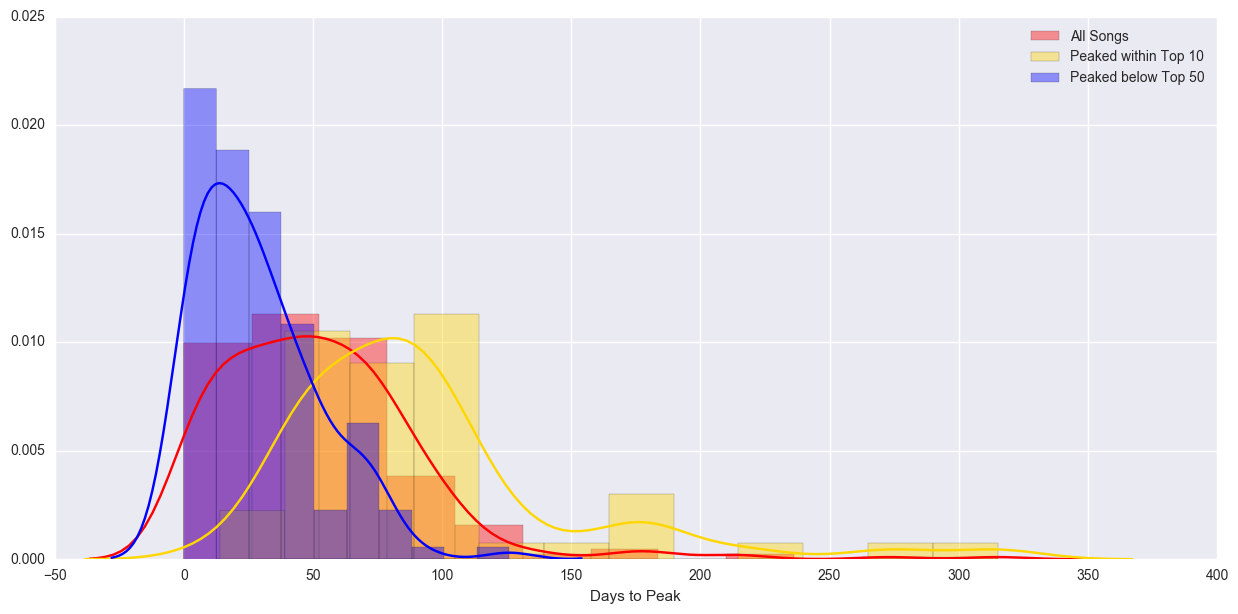

In [49]:
top_10_billboard = billboard[billboard["peak_rank"]<=10]
top_51_thru_100 = billboard[billboard["peak_rank"] > 50]
plt.figure(figsize=(15,7))
sns.distplot(billboard['days_to_peak'],bins=12, label='All Songs',color='r')
sns.distplot(top_10_billboard['days_to_peak'],bins=12, label="Peaked within Top 10",color='gold')
sns.distplot(top_50_thru_100['days_to_peak'], label="Peaked below Top 50",color='b')
plt.xlabel("Days to Peak")
plt.legend()
plt.show()

The next thing we looked at was seasonality.  I was curious if there's an ideal time of year to debut on the list.  It turned out that in 2000 songs to reach the #1 spot on Billboard 100 debuted in the spring.

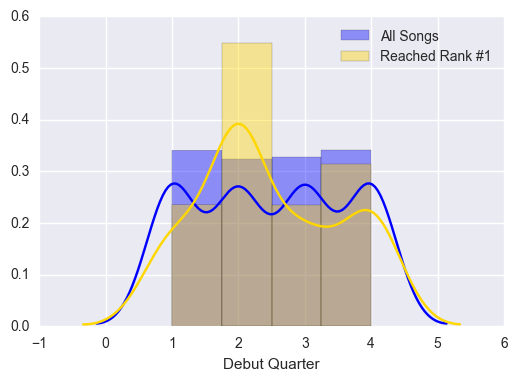

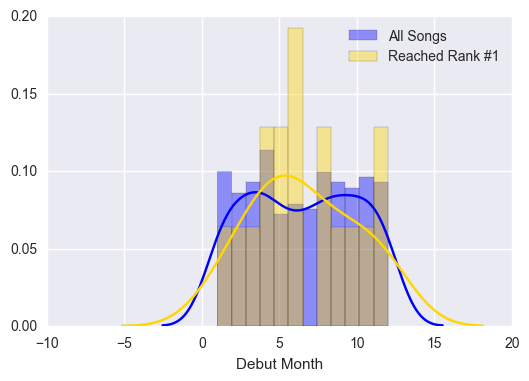

In [54]:
reached_rank_1 = billboard[billboard["peak_rank"]==1]


sns.distplot(billboard["debut quarter"],color='blue',label = "All Songs")
sns.distplot(reached_rank_1["debut quarter"],color='gold',label="Reached Rank #1")
plt.xlabel("Debut Quarter")
plt.legend()
plt.show()


sns.distplot(billboard["debut month"],color='blue',bins=12,label="All Songs")
sns.distplot(reached_rank_1["debut month"],color='gold',bins=12,label="Reached Rank #1")
plt.xlabel("Debut Month")
plt.legend()
plt.show()


While looking at songs which reached the #1 spot, let's look at what the journey to the top looks like.  Most have a steep climb to the top and then peter out.

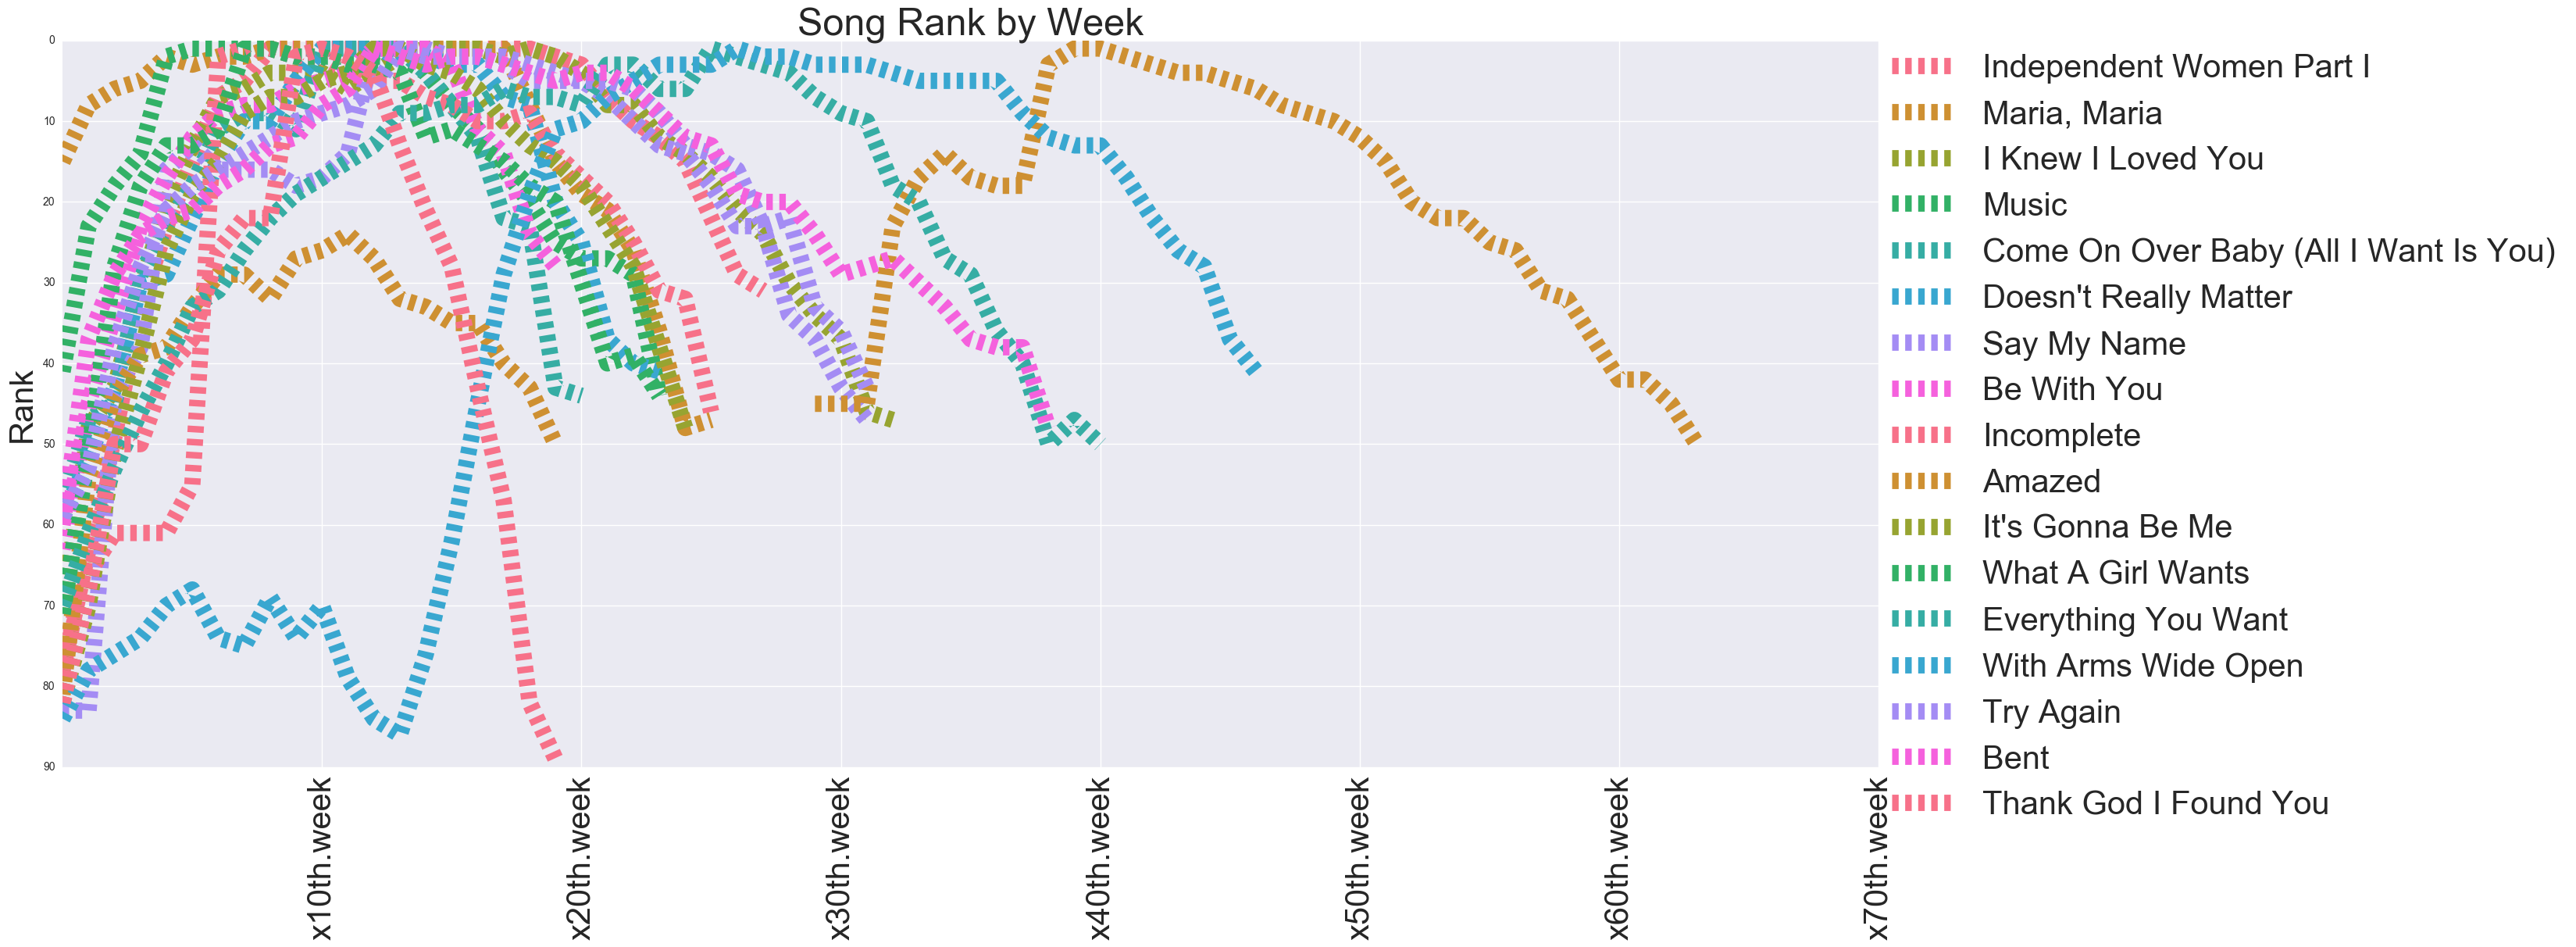

In [73]:
reached_rank_1 = billboard[billboard['peak_rank']==1]
plt.figure(figsize=(30,12))

#plot a line for each song that reached #1 and track it's progress over the weeks since entering
for i in range(len(reached_rank_1)):
    plt.plot(range(len(result.ix[0,week_column_list])),result.ix[:,week_column_list].values[i],label=str(result.ix[i,0]),linewidth=15,ls="--")

plt.xticks(range((len(result.ix[0,:])-1))[10::10],result.columns[10::10],rotation=90,fontsize=30)
plt.gca().invert_yaxis()
plt.title("Song Rank by Week",fontsize=35)
plt.ylabel("Rank",fontsize=30)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,fontsize=30)
plt.show()

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 